In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/lib/kaggle/gcp.py
/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv
/kaggle/working/submission_3.csv
/kaggle/working/submission_6.csv
/kaggle/working/submission_4.csv
/kaggle/working/C:\Users\Tushar\Downloads\submission_1.csv
/kaggle/working/__notebook_source__.ipynb
/kaggle/working/submission_1.csv
/kaggle/working/submission_7.csv
/kaggle/working/submission_5.csv
/kaggle/working/submission_2.csv


## Steps to be performed throughout the whole project :
1. Seeing through the data and getting to know the columns and the dataset
2. EDA
3. Feature Engineering and preprocessing
4. Model Training (I will be trying out different types of models and will make submissions for all the models which will be built)
5. Model Evaluation 
6. Hyperparameter tuning 
7. Generating the test results

In [4]:
# importing all the libraries
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
filepath = '../input/spaceship-titanic/train.csv'
data = pd.read_csv(filepath)

In [6]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
data.shape

(8693, 14)

### *Decriptive statistics

In [8]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [10]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# Exploratory Data Analysis

In [11]:
# separating the numerical columns and categorical columns
# passenger_id and name column will be excluded because they dont have a relevance here

numerical_cols = [features for features in data.columns if data[features].dtype != "object" and features not in ("Transported")]
categorical_cols = [features for features in data.columns if data[features].dtype == "object" and
                    features not in('PassengerId','Name')]

print("Numerical features : ",numerical_cols) 
print("Categorical features : ",categorical_cols)

Numerical features :  ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
Categorical features :  ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']


In [12]:
num_df = data[numerical_cols]
num_df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


In [13]:
# observing the null values if any but we will resolve that in the feature engineering part
# we will observe what % of total observations are missing for each column
num_df.isnull().mean()*100

Age             2.059128
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
dtype: float64

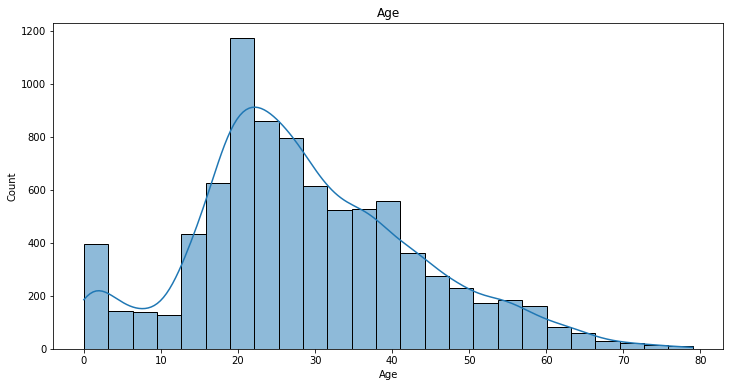

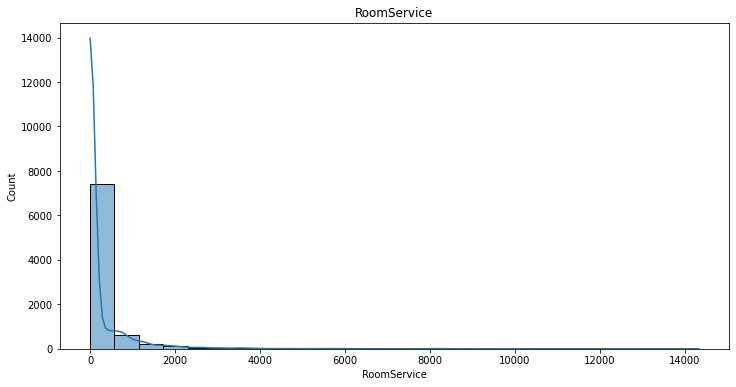

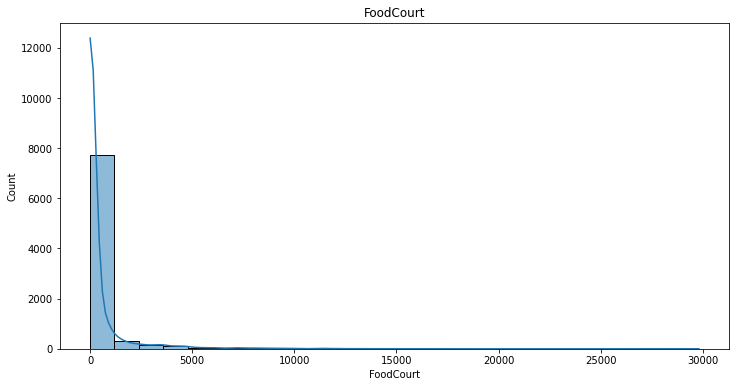

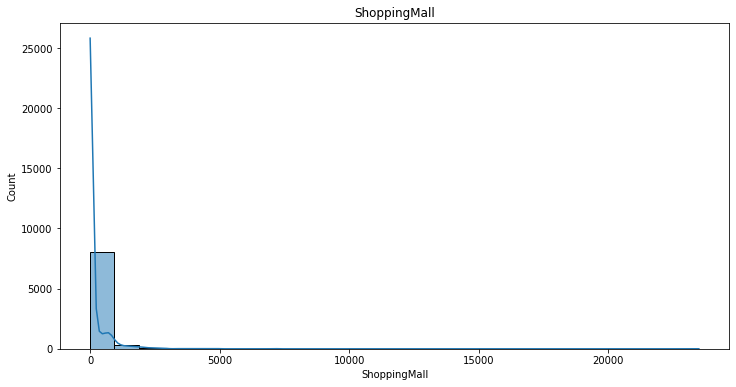

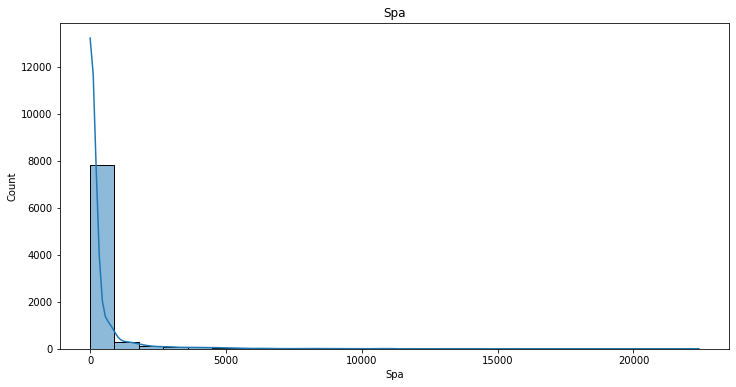

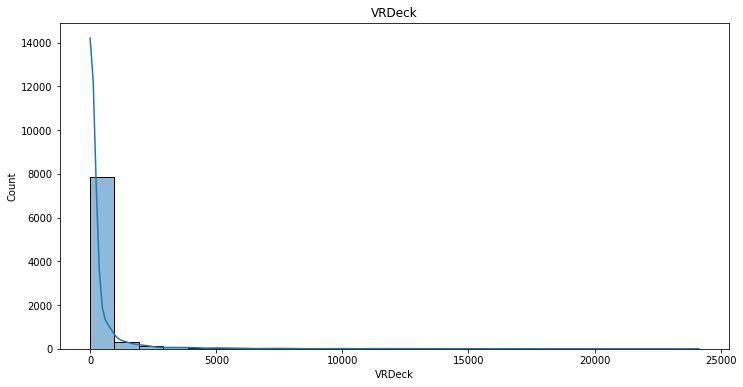

In [14]:
# lets observe how they are distiributed by plotting the histogram for each column

for cols in numerical_cols:
    plt.figure(figsize=(12,6))
    sns.histplot(num_df[cols],bins = 25,kde=True)
    plt.title(cols)
    

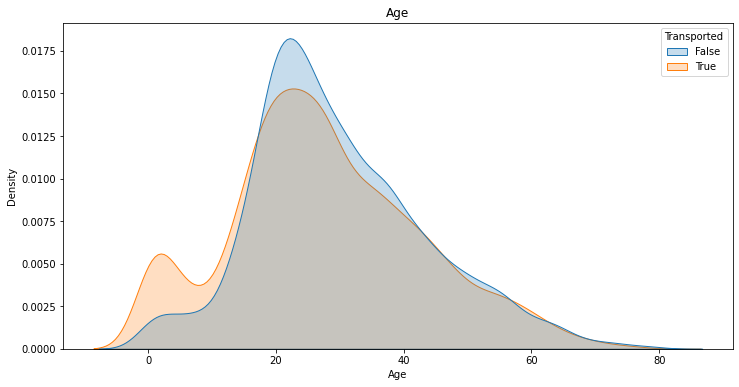

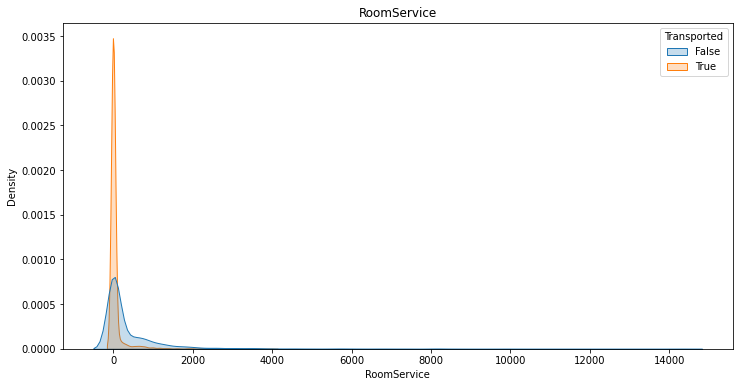

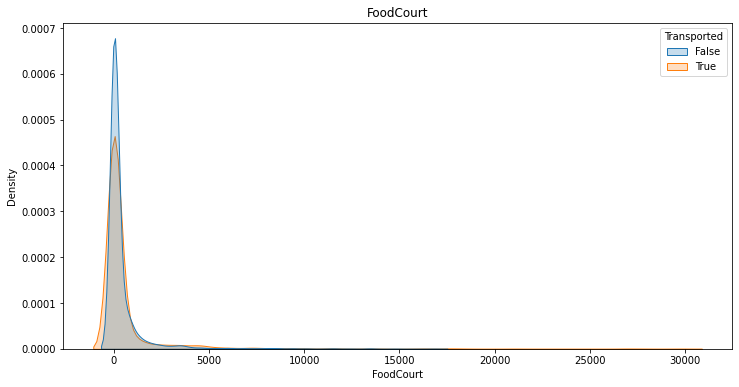

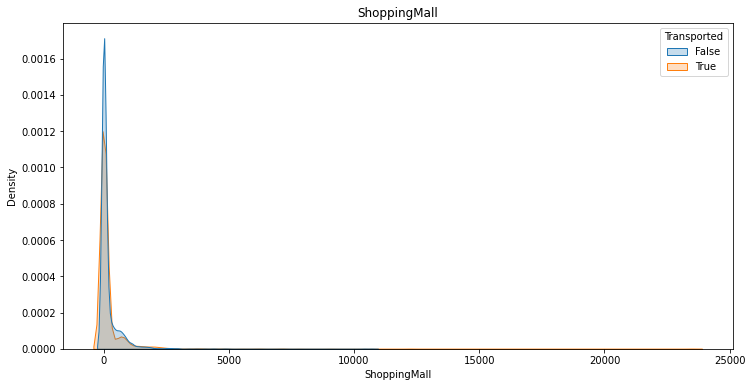

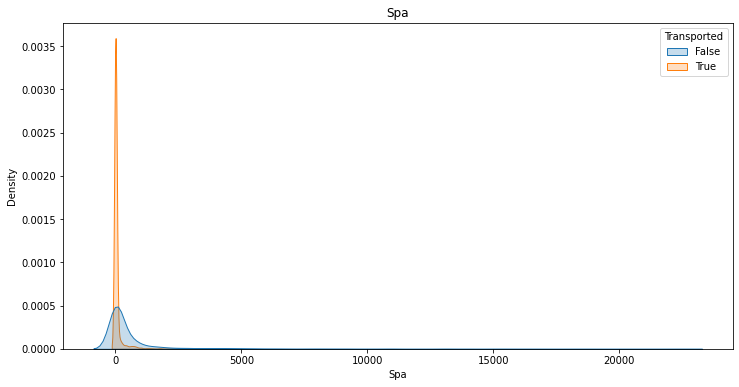

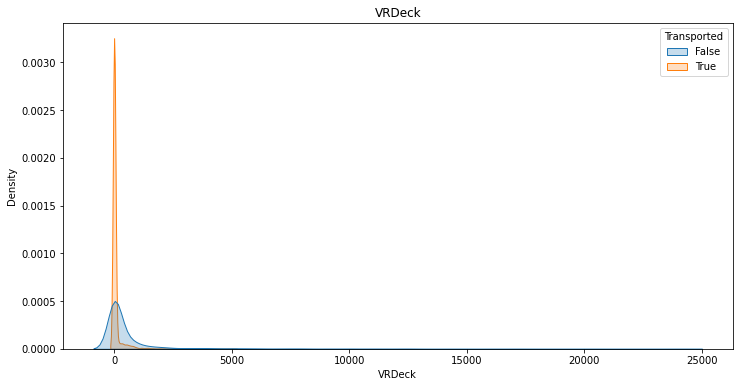

In [15]:
for cols in numerical_cols:
    plt.figure(figsize = (12,6))
    sns.kdeplot(num_df[cols],shade=True,hue = data['Transported'])
    plt.title(cols)
    plt.show()

<AxesSubplot:>

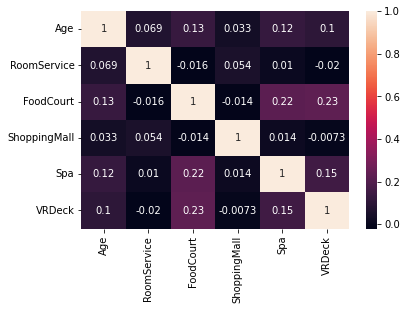

In [16]:
#plotting a pairplot/heatmap to check if theres any correlation 
sns.heatmap(num_df.corr(),annot = True)

### Looking at the heatmap there doesnt seem to be a significant relation between the numerical columns

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


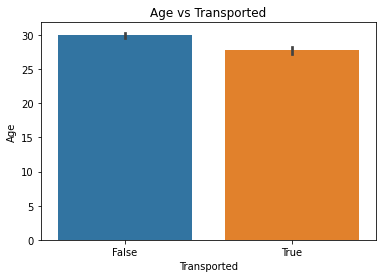

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


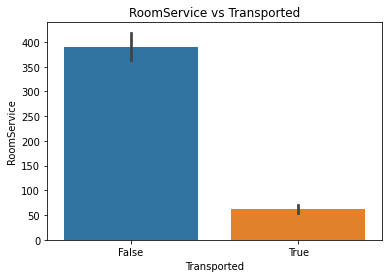

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


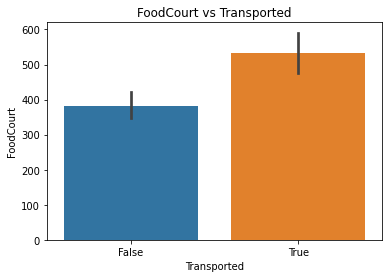

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


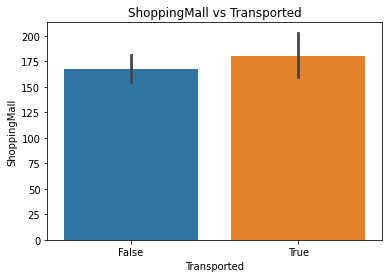

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


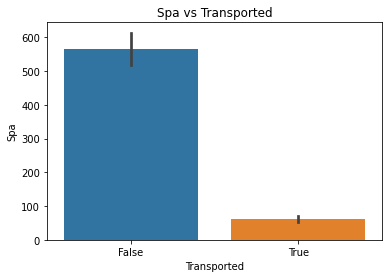

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


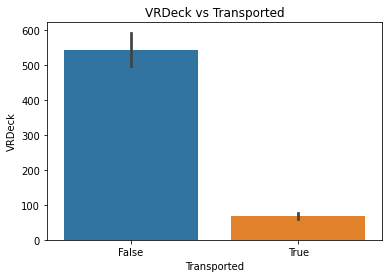

In [17]:
for cols in numerical_cols:
    sns.barplot(data["Transported"],num_df[cols])
    plt.title("{} vs Transported".format(cols))
    plt.show()

Age                AxesSubplot(0.125,0.125;0.110714x0.755)
RoomService     AxesSubplot(0.257857,0.125;0.110714x0.755)
FoodCourt       AxesSubplot(0.390714,0.125;0.110714x0.755)
ShoppingMall    AxesSubplot(0.523571,0.125;0.110714x0.755)
Spa             AxesSubplot(0.656429,0.125;0.110714x0.755)
VRDeck          AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

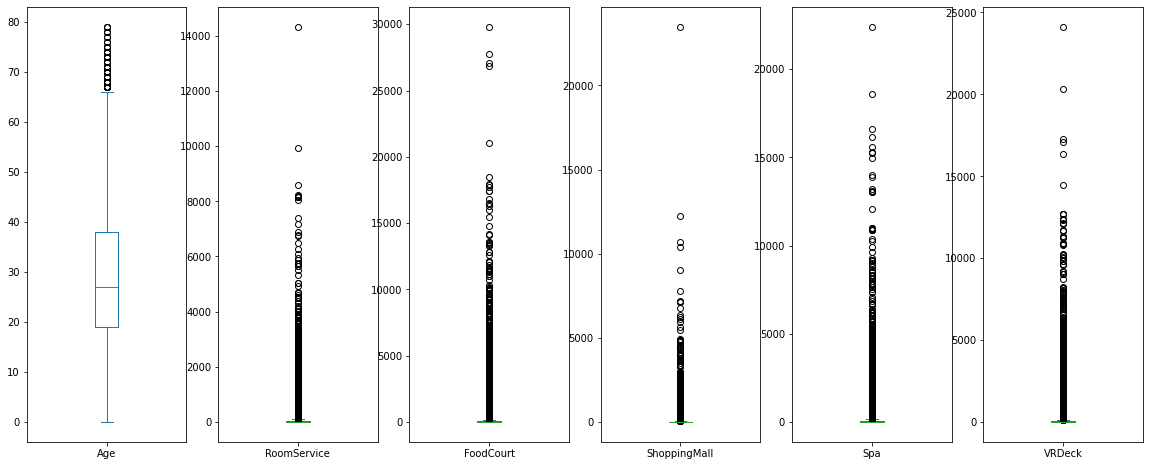

In [18]:
num_df.plot(kind='box',subplots=True,figsize = (20,8))

1. Lookinng at the boxplots we see a whole lot of outliers .In feature engineering part we will find the actual % of how many outliers are actually present.
 
2. One possible reason for these many outliers is that for the services columns (RoomService ,FoodCourt ,ShoppingMall ,Spa ,VRDeck) majority of people had a total spending of 0    hence the quartiles are centered around 0 .Because of this the other spending values are being treated as outliers. 

## categorical columns

In [19]:
categorical_cols

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

In [20]:
data[categorical_cols].head()

,HomePlanet,CryoSleep,Cabin,Destination,VIP
0,Europa,False,B/0/P,TRAPPIST-1e,False
1,Earth,False,F/0/S,TRAPPIST-1e,False
2,Europa,False,A/0/S,TRAPPIST-1e,True
3,Europa,False,A/0/S,TRAPPIST-1e,False
4,Earth,False,F/1/S,TRAPPIST-1e,False


In [21]:
# unique values
for cols in categorical_cols:
    print(cols , data[cols].unique() , '\n')

HomePlanet ['Europa' 'Earth' 'Mars' nan] 

CryoSleep [False True nan] 

Cabin ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S'] 

Destination ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan] 

VIP [False True nan] 



/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


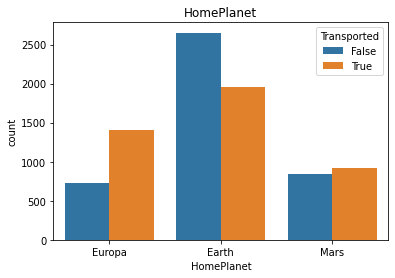

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


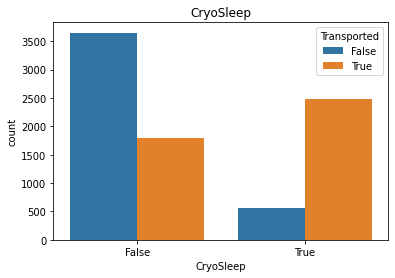

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


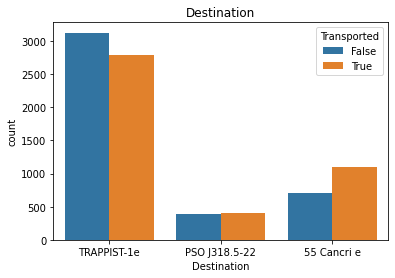

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


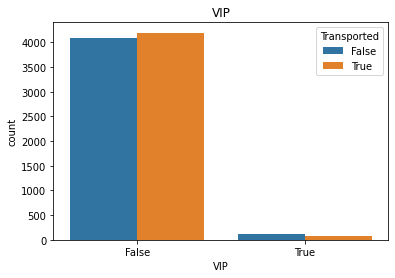

In [22]:
for col in [cols for cols in categorical_cols if cols not in ['Cabin']]:
    sns.countplot(col,hue = 'Transported',data = data)
    plt.title(col)
    plt.show()

In [23]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [24]:
data.pivot_table('Transported',index = 'VIP',columns = 'HomePlanet',aggfunc = 'count')

HomePlanet,Earth,Europa,Mars
VIP,,,
False,4487.0,1958.0,1653.0
True,NaN,131.0,63.0


Among the homeplanet , from earth there were no one who chose the VIP 

In [25]:
data.pivot_table('Transported',index = 'CryoSleep',columns = 'HomePlanet',aggfunc = 'count')

HomePlanet,Earth,Europa,Mars
CryoSleep,,,
False,3106,1162,1047
True,1382,911,669


# FEATURE ENGINEERING

#### 1. Here mostly we will be handling missing values and outliers check which was already done in the EDA part .
#### 2. We will be using imputation with mean/median/mode .
#### 3. Will also remove the unwanted features (PassengerId and Name)

In [26]:
dataset1 = data.copy()

In [27]:
dataset1.isnull().mean()

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [28]:
# instead of cabin column we will use a 0/1 version for the cabin
dataset1['Cabin'] = np.where(data['Cabin'].isnull(),'false','true')

In [29]:
X = dataset1.drop(['PassengerId','Name','Transported'],axis = 1)
y = dataset1['Transported']

In [30]:
num_cols = [col for col in X.columns if X[col].dtype != 'O']
cat_cols = [col for col in X.columns if X[col].dtype == 'O']
print(num_cols)
print(cat_cols)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']


In [31]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# building separate pipelines for numerical and categorical columns and then combining them through a column transformer

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = 'median')),
    ('scaler' ,MinMaxScaler())
])

cat_pipeline = Pipeline([
    ('cat_imputer' ,SimpleImputer(strategy = 'most_frequent')),
    ('ohe_encoder' ,OneHotEncoder(sparse = False ,handle_unknown = 'ignore'))
])

ct = ColumnTransformer([('num_pipeline' ,num_pipeline ,num_cols),
                       ('cat_pipeline' ,cat_pipeline ,cat_cols)])


In [32]:
X.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,true,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,true,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,true,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,true,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,true,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


In [33]:
transformed_X = ct.fit_transform(X)


In [34]:
# train test split
from sklearn.model_selection import train_test_split
X_train ,X_val ,y_train ,y_val = train_test_split(X ,y ,random_state = 1)
transformed_x_train = ct.fit_transform(X_train)
transformed_x_val = ct.fit_transform(X_val)

# Model training and evaluation 
Initially all are used with default settings . We will perform hyperparameter tuning in the next section

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [36]:
# Using the LogisticRegression model

logreg = LogisticRegression(solver='liblinear')
scores = cross_val_score(logreg,transformed_X,y,cv = 5)
print(np.round(scores.mean(),4))

0.7625


In [37]:
# support vector machine model
svm = SVC(kernel = 'poly')
svm.fit(transformed_x_train,y_train)
scores = cross_val_score(svm,transformed_X,y,cv = 5)
print(np.round(scores.mean(),4))

0.7643


In [38]:
# knn model
knn = KNeighborsClassifier(n_neighbors = 2)
scores = cross_val_score(knn,transformed_X, y ,cv = 5 ) 
print(np.round(scores.mean(),4))

0.721


In [39]:
# decision tree model 
tree = DecisionTreeClassifier()
scores = cross_val_score(tree,transformed_X, y ,cv = 5)
print(np.round(scores.mean(),4))

0.7377


In [40]:
# random classifier model
rf_model  = RandomForestClassifier()
scores = cross_val_score(rf_model,transformed_X, y ,cv = 5)
print(np.round(scores.mean(),4))

0.7874


In [41]:
# gradient decent classifier model
grad_decent = GradientBoostingClassifier()
scores = cross_val_score(grad_decent,transformed_X, y ,cv = 5)
print(np.round(scores.mean(),4))

0.7931


In [42]:
# xgboost model 
xbg = XGBClassifier()
scores = cross_val_score(xbg,transformed_X, y ,cv = 5)
print(np.round(scores.mean(),4))

0.7851


## Scores for each model on train and test set (Here the original train dataset is divided further into train and test splits)

 **MODEL** | **Default_Score** | **Tuned_Score** 
---|---|---
 Logistic Regression | 76.25% |  78.66%
 Support Vector machine | 76.43% |  78.22%
 Decision tree | 73.73% |  78.27%
 K nearest neighbor | 72.10% |  77.55%
 Random Forest | 78.74% |  79.63%
 Gradient Decent | **79.31%** |  79.60%
 XGBoost | 78.51% | **79.65%**
 



# HYPER PARAMETER TUNING

In [43]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [46]:
# Logistic regression model tuning
model_log = LogisticRegression(solver = 'liblinear')
param_log = {'penalty' : ['l1', 'l2'],"C" : [100, 10, 1.0,0.05 ,0.025, 0.1,0.15, 0.01]}
clf_log = GridSearchCV(estimator = model_log , param_grid = param_log ,cv = 10,scoring = 'accuracy',verbose = True ,n_jobs = -1)
clf_log.fit(transformed_X ,y)
print("Best Score : {} --- paramters {}".format(clf_log.best_score_,clf_log.best_params_))

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best Score : 0.7866109810457257 --- paramters {'C': 10, 'penalty': 'l1'}


In [47]:
# SVM model tuning
model_svm = SVC(random_state= 1)
param_svm = {"C" : [10, 1.0, 0.1],"kernel" : ['linear','rbf','poly'],'gamma': [1,0.1,0.01]}
clf_svm = GridSearchCV(estimator = model_svm , param_grid = param_svm ,cv = 5 ,scoring = 'accuracy',n_jobs = -1,verbose = True)
clf_svm.fit(transformed_X ,y)
print("Best Score : {} --- paramters {}".format(clf_svm.best_score_,clf_svm.best_params_))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Score : 0.7822400345158222 --- paramters {'C': 1.0, 'gamma': 1, 'kernel': 'poly'}


In [50]:
# Decision tree model tuning
model_tree = DecisionTreeClassifier(random_state= 1)
param_tree = {'criterion' : ["gini", "entropy"] ,'max_depth' : range(2,15),'splitter':['best',"random"]}
clf_tree = GridSearchCV(estimator = model_tree , param_grid = param_tree ,cv = 10 ,scoring = 'accuracy',n_jobs = -1,verbose = True)
clf_tree.fit(transformed_X ,y)
print("Best Score : {} --- paramters {}".format(clf_tree.best_score_,clf_tree.best_params_))

Fitting 10 folds for each of 52 candidates, totalling 520 fits
Best Score : 0.7827022737192968 --- paramters {'criterion': 'entropy', 'max_depth': 9, 'splitter': 'best'}


In [52]:
# knn model tuning
model = KNeighborsClassifier()
param = {'n_neighbors':list(range(1,20)),'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
clf_knn = GridSearchCV(estimator = model , param_grid = param ,cv = 5,scoring = 'accuracy',n_jobs = -1,verbose = True)
clf_knn.fit(transformed_X ,y)
print("Best Score : {} --- paramters {}".format(clf_knn.best_score_,clf_knn.best_params_))

Fitting 5 folds for each of 76 candidates, totalling 380 fits
Best Score : 0.7755697327472173 --- paramters {'algorithm': 'ball_tree', 'n_neighbors': 19}


In [54]:
# Random Forest model tuning
model_rf = RandomForestClassifier(random_state = 1)
param_rf = {'bootstrap': [True, False],
 'max_depth': list(range(3,10)),
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200,300,500,1000]}

clf_rf = RandomizedSearchCV(estimator = model_rf , param_distributions=param_rf ,cv = 3 ,random_state = 1,scoring = 'accuracy',n_jobs = -1,verbose=True,n_iter= 100)
clf_rf.fit(transformed_X ,y)
print("Best Score : {} --- paramters {}".format(clf_rf.best_score_,clf_rf.best_params_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Score : 0.7963892428480984 --- paramters {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 9, 'bootstrap': True}


In [56]:
# Gradient decent model tuning
model_grad = GradientBoostingClassifier(random_state = 1)
parameters_grad = {
    "loss":["deviance"],
    "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25],
    'max_depth': list(range(3,10)),
    'n_estimators': [100, 300, 500, 800 ,1000]
    }
clf_grad = RandomizedSearchCV(estimator = model_grad , param_distributions=parameters_grad ,cv = 3 ,random_state = 1,scoring = 'accuracy',n_jobs = -1,verbose=True,n_iter = 100)
clf_grad.fit(transformed_X ,y)
print("Best Score : {} --- paramters {}".format(clf_grad.best_score_,clf_grad.best_params_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Score : 0.7960442566932039 --- paramters {'n_estimators': 100, 'max_depth': 5, 'loss': 'deviance', 'learning_rate': 0.05}


In [58]:
# XGBoost model tuning 
model_xgb = XGBClassifier(random_state=1)
param_xgb = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25] ,
             "max_depth"        : [ 3, 4, 5, 6, 8],
             "min_child_weight" : [ 1, 3, 5, 7 ],
             "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
             "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

clf_xgb = RandomizedSearchCV(estimator = model_xgb , param_distributions=param_xgb ,cv = 3 ,random_state = 1,scoring = 'accuracy',n_jobs = -1,verbose=True,n_iter= 100)
clf_xgb.fit(transformed_X ,y)
print("Best Score : {} --- paramters {}".format(clf_xgb.best_score_,clf_xgb.best_params_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Score : 0.7965040661833447 --- paramters {'min_child_weight': 5, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.7}


### All the models are being trained and tuned but I would rather choose the Logistic Regression model since it works best with binary classification or the SVM model as both of them are quite simple and easy to implement and fine tune rather than going for a complex model such as ensembling or boosting techniques

In [59]:
# importing the test data set and runnin through the preprocessor
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [60]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [64]:
processed_test = ct.transform(test.drop(["PassengerId","Name"],axis= 1))

In [68]:
clf_log.best_estimator_.predict(processed_test)

array([ True, False,  True, ...,  True,  True,  True])

In [70]:
y_pred_log = clf_log.best_estimator_.predict(processed_test)
submission_1 = pd.DataFrame({'PassengerId':test['PassengerId'],"Transported":y_pred_log})

y_pred_svm = clf_svm.best_estimator_.predict(processed_test)
submission_2 = pd.DataFrame({'PassengerId':test['PassengerId'],"Transported":y_pred_svm})

y_pred_tree = clf_tree.best_estimator_.predict(processed_test)
submission_3 = pd.DataFrame({'PassengerId':test['PassengerId'],"Transported":y_pred_tree})

y_pred_knn = clf_knn.best_estimator_.predict(processed_test)
submission_4 = pd.DataFrame({'PassengerId':test['PassengerId'],"Transported":y_pred_knn})

y_pred_rf = clf_rf.best_estimator_.predict(processed_test)
submission_5 = pd.DataFrame({'PassengerId':test['PassengerId'],"Transported":y_pred_rf})

y_pred_grad= clf_grad.best_estimator_.predict(processed_test)
submission_6 = pd.DataFrame({'PassengerId':test['PassengerId'],"Transported":y_pred_grad})

y_pred_xgb = clf_xgb.best_estimator_.predict(processed_test)
submission_7 = pd.DataFrame({'PassengerId':test['PassengerId'],"Transported":y_pred_xgb})

In [85]:
submission_1.to_csv("submission.csv",index=False)

submission_2.to_csv("submission_2.csv",index=False)

submission_3.to_csv("submission_3.csv",index=False)

submission_4.to_csv("submission_4.csv",index=False)

submission_5.to_csv("submission_5.csv",index=False)

submission_6.to_csv("submission_6.csv",index=False)

submission_7.to_csv("submission_7.csv",index=False)